# **Algoritmo para clasificar malignancy**

In [1]:
import numpy as np
import pandas as pd
def std(lista, valor_excluir = 3):
    # Crear una nueva lista sin el valor a excluir
    lista_filtrada = [x for x in lista if x != valor_excluir]
    
    if len(lista) == 2 and 3 in lista  :
        return 99999
    
    # Si la lista filtrada está vacía o tiene un solo elemento, std no se puede calcular
    if len(lista_filtrada) <= 1:
        return None  # O puedes retornar 0 o un mensaje de error
    
    # Calcular la desviación estándar usando numpy
    std = np.std(lista_filtrada)
    
    return std

def classify_nodule(annotations, threshold = 0.7,lower_limit = 3, upper_limit = 4,three_limit = 1):
    # Fase 1: Contar las ocurrencias de cada anotación
    count_dict = {}
    for annotation in annotations:
        if annotation in count_dict:
            count_dict[annotation] += 1
        else:
            count_dict[annotation] = 1
    
    # Fase 2: Inicializar variables de control
    count_3 = count_dict.get(3, 0)  # Cuántas veces se repite el 3
    benign_others = True  # Solo se repiten 1 y 2
    malignant_others = True  # Solo se repiten 4 y 5
    
    if len(annotations) < lower_limit or len(annotations) > upper_limit : 
        return "Unlabeled","Lenght not valid"
    
    for annotation, count in count_dict.items():
        #print(count)
        if count >= 2:  # Consideramos solo los que se repiten
            
            if annotation == 3:
                if count > three_limit:
                    return "Unlabeled","Demasiados 3" # Si hay más de un 3
            elif annotation in [1, 2]:  # Repeticiones de 1 o 2, posible Benigno
                malignant_others = False  # No puede ser Maligno si hay 1 o 2
            elif annotation in [4, 5]:  # Repeticiones de 4 o 5, posible Maligno
                
                benign_others = False  # No puede ser Benigno si hay 4 o 5
                #print(annotation)
            else:
                # Si hay algo fuera de 1, 2, 4, 5 es Unlabeled
                return "Unlabeled"

    # Fase 3: Verificar desviación estándar
    if std(annotations) > threshold:
        return "Unlabeled",f"Std: {std(annotations)} > {threshold}"

    # Fase 4: Clasificación según las reglas
    if count_3 <= 1:
        
        #print(list(count_dict.keys()))
        if benign_others and (1 in list(count_dict.keys()) or 2 in list(count_dict.keys())):
            #print(list(count_dict.keys()) not in [4,5])
            return "Benigno","benign_others"
        
        elif malignant_others and (4 in list(count_dict.keys()) or 5 in list(count_dict.keys())):
            return "Maligno","malignant_others"

    # Si ninguna de las condiciones se cumple
    return "Unlabeled","None Condition"



# Ejemplos de uso
threshold = 0.7  # Umbral de ejemplo para la desviación estándar

print(classify_nodule([3, 1, 2, 1], threshold))  # Benigno
print(classify_nodule([3, 4, 5, 4], threshold))  # Maligno
print(classify_nodule([1, 2, 2, 1], threshold))  # Benigno
print(classify_nodule([4, 4, 5, 5], threshold))  # Maligno
print(classify_nodule([3, 3, 4, 4], threshold))  # Unlabeled
print(classify_nodule([1, 2, 3, 4], threshold))  # Unlabeled
print(classify_nodule([3, 3, 2, 2], threshold))  # Unlabeled
print(classify_nodule([3, 1, 3, 2], threshold))  # Unlabeled
print(classify_nodule([4,3,4], threshold))  # Unlabeled
print(classify_nodule([1,3], threshold,lower_limit = 2))  # Maligno


('Benigno', 'benign_others')
('Maligno', 'malignant_others')
('Benigno', 'benign_others')
('Maligno', 'malignant_others')
('Unlabeled', 'Demasiados 3')
('Unlabeled', 'Std: 1.247219128924647 > 0.7')
('Unlabeled', 'Demasiados 3')
('Unlabeled', 'Demasiados 3')
('Maligno', 'malignant_others')
('Unlabeled', 'Std: 99999 > 0.7')


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylidc as pl 

scan = pl.query(pl.Scan) # Iterate through all patients
# Asumiendo que scan ya está definido y contiene tus datos
data = []

for sc in scan: 
    nodules_annotation_list = sc.cluster_annotations() 
    for idx, nodule in enumerate(nodules_annotation_list): 
        lista_annotations = [anotation.malignancy for anotation in nodule]
        data.append((sc.patient_id, "I00"+ str(idx), lista_annotations))

# Crear un DataFrame a partir de los datos
df = pd.DataFrame(data, columns=['patient_id', 'nodule_index', 'annotations'])
# Añadimos dos nuevas columnas: una para la longitud de las listas y otra para su suma
df['length'] = df['annotations'].apply(len)


# Ahora ordenamos primero por longitud (descendente) y luego por la suma (también descendente)
l_sorted = df.sort_values(by=['length'], ascending=[True])

# Para mostrar el DataFrame resultante
print(l_sorted.head())



Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some n

In [11]:
#l_sorted = pd.read_csv("files/malignancies.csv")
#l_sorted['annotations'] = l_sorted['annotations'].apply(eval)
l_sorted['m'] = l_sorted.apply(
    lambda row: classify_nodule(row['annotations'],lower_limit=2),
    axis=1
)
def get_first(tuple):
    return tuple[0]
l_sorted['Malignancy_al'] = l_sorted['m'].apply(get_first)
l_sorted.to_csv("files/malignancies.csv",index=None)

#print(l_sorted['Malignancy_al']).value_counts()

# **JOIN DE DATASET FINAL CON DATOS SEGUROS**

In [12]:
import pandas as pd

# Leer el archivo CSV
final = pd.read_csv("files/final.csv", index_col=0)
l_sorted = pd.read_csv("files/malignancies.csv")

# Strip whitespace from column names
final.columns = final.columns.str.strip()
l_sorted.columns = l_sorted.columns.str.strip()

# Renombrar columnas en 'final' para que coincidan con 'l_sorted'
final.rename(columns={'Patient': 'patient_id', 'Nodule': 'nodule_index'}, inplace=True)

# Verificar las columnas de l_sorted
print("Columnas en l_sorted:", l_sorted.columns.tolist())

# Verificar las columnas de final
print("Columnas en final:", final.columns.tolist())

# Revisar el tipo de dato de 'patient_id'
print("Tipo de dato de 'patient_id' en l_sorted:", l_sorted['patient_id'].dtype)

# Opcional: imprimir las primeras filas de l_sorted para asegurarse de que se ha cargado correctamente
print(l_sorted.head())

# Filtrar para obtener las filas de final que están en l_sorted
filtered_final = final.merge(
    l_sorted[['patient_id', 'nodule_index', 'Malignancy_al']],  # Asegúrate de incluir las columnas necesarias
    left_on=['patient_id', 'nodule_index'],
    right_on=['patient_id', 'nodule_index'],
    how='inner'
)

# Imprimir las columnas de filtered_final para diagnóstico
print("Columnas en filtered_final después del merge:", filtered_final.columns.tolist())

# Resultado final
print(filtered_final)

# Guardar el resultado en un archivo CSV
filtered_final.to_csv("files/SMOTE.csv", index=None)


Columnas en l_sorted: ['patient_id', 'nodule_index', 'annotations', 'length', 'm', 'Malignancy_al']
Columnas en final: ['patient_id', 'nodule_index', 'original_firstorder_10Percentile', 'original_firstorder_90Percentile', 'original_firstorder_Energy', 'original_firstorder_Entropy', 'original_firstorder_InterquartileRange', 'original_firstorder_Kurtosis', 'original_firstorder_Maximum', 'original_firstorder_Mean', 'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Median', 'original_firstorder_Minimum', 'original_firstorder_Range', 'original_firstorder_RobustMeanAbsoluteDeviation', 'original_firstorder_RootMeanSquared', 'original_firstorder_Skewness', 'original_firstorder_TotalEnergy', 'original_firstorder_Uniformity', 'original_firstorder_Variance', 'original_glcm_Autocorrelation', 'original_glcm_ClusterProminence', 'original_glcm_ClusterShade', 'original_glcm_ClusterTendency', 'original_glcm_Contrast', 'original_glcm_Correlation', 'original_glcm_DifferenceAverage', 'orig

# **SMOTE PRED**

In [14]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cargar el DataFrame original
data = pd.read_csv("files/SMOTE.csv")

# Separar características y etiquetas (eliminar clase 'Unlabeled')
X = data[data['Malignancy_al'] != "Unlabeled"].drop(columns=["patient_id", "nodule_index", 'Malignancy', 'Malignancy_al'])
y = data[data['Malignancy_al'] != "Unlabeled"]['Malignancy_al']

# Convertir las clases a enteros
class_mapping = {label: idx for idx, label in enumerate(y.unique())}
y = y.map(class_mapping)

# Imprimir las clases
print("Clases únicas en el conjunto filtrado:", y.unique())

# Dividir el conjunto original en 80% entrenamiento y 20% prueba (Holdout)
X_train_original, X_test, y_train_original, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Contar el número de muestras por clase en el conjunto de entrenamiento
class_counts = y_train_original.value_counts()
print("Número de muestras por clase en el conjunto de entrenamiento antes de SMOTE:")
print(class_counts)

# Ajustar el sampling_strategy basado en el número máximo de muestras
max_count = class_counts.max()
sampling_strategy = {label: max_count for label in class_counts.index}

# Aplicar SMOTE al conjunto de entrenamiento (80%)
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_original, y_train_original)

# Dividir los datos balanceados (tras SMOTE) en entrenamiento y validación (80% del entrenamiento balanceado)
X_train, X_val, y_train, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# Entrenar el modelo XGBoost en los datos de entrenamiento balanceados
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de validación
y_val_pred = xgb_model.predict(X_val)

# Calcular y mostrar la precisión (accuracy) en el conjunto de validación
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Accuracy en el conjunto de validación:", val_accuracy)

# Mostrar la matriz de confusión y el reporte de clasificación
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
class_report_val = classification_report(y_val, y_val_pred)

print("Matriz de Confusión (Validación):\n", conf_matrix_val)
print("\nReporte de Clasificación (Validación):\n", class_report_val)

# Evaluar el modelo en el conjunto de prueba original (el holdout)
y_test_pred = xgb_model.predict(X_test)

# Calcular y mostrar la precisión (accuracy) en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy en el conjunto de prueba (holdout):", test_accuracy)

# Mostrar la matriz de confusión y el reporte de clasificación para el conjunto de prueba
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
class_report_test = classification_report(y_test, y_test_pred)

print("Matriz de Confusión (Prueba - Holdout):\n", conf_matrix_test)
print("\nReporte de Clasificación (Prueba - Holdout):\n", class_report_test)


Clases únicas en el conjunto filtrado: [0 1]
Número de muestras por clase en el conjunto de entrenamiento antes de SMOTE:
Malignancy_al
1    313
0    168
Name: count, dtype: int64
Accuracy en el conjunto de validación: 0.9523809523809523
Matriz de Confusión (Validación):
 [[63  4]
 [ 2 57]]

Reporte de Clasificación (Validación):
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.93      0.97      0.95        59

    accuracy                           0.95       126
   macro avg       0.95      0.95      0.95       126
weighted avg       0.95      0.95      0.95       126

Accuracy en el conjunto de prueba (holdout): 0.9669421487603306
Matriz de Confusión (Prueba - Holdout):
 [[43  3]
 [ 1 74]]

Reporte de Clasificación (Prueba - Holdout):
               precision    recall  f1-score   support

           0       0.98      0.93      0.96        46
           1       0.96      0.99      0.97        75

    a

C:\Users\Alejandro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\core.py:158: UserWarning: [21:41:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# **Co-ocurrency**

Matriz de Co-ocurrencia:
     1     2     3    4    5
1  580   147   208   75   28
2  147  1265   768  322  121
3  208   768  1700  490  242
4   75   322   490  726  228
5   28   121   242  228  402


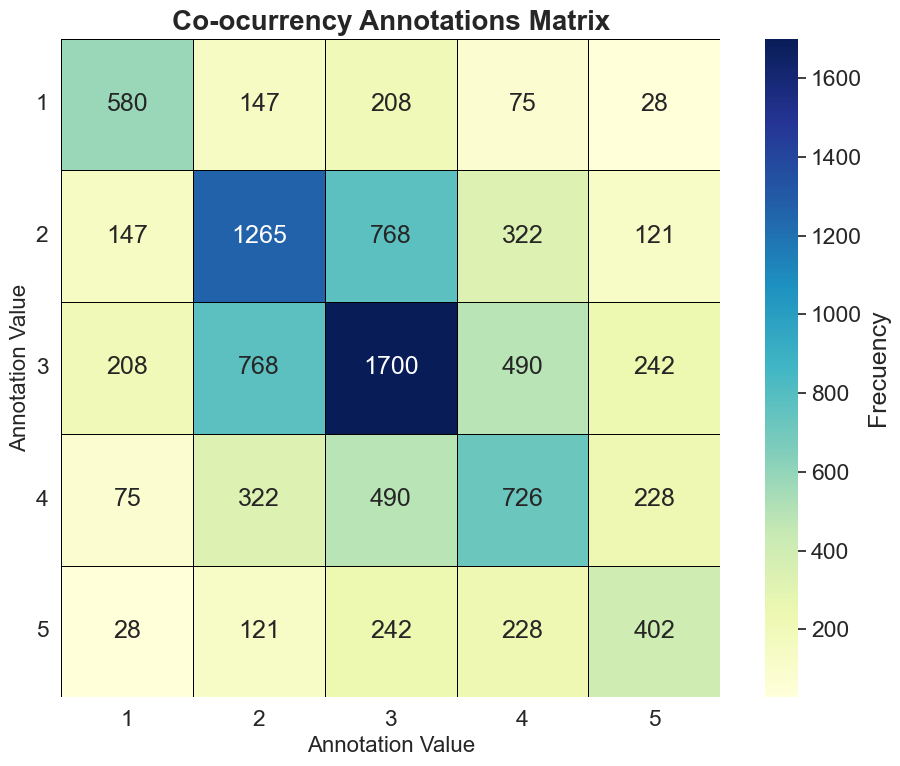

In [17]:
# Extraer listas de anotaciones
import seaborn as sns 
lista_anotaciones = [item[2] for item in data]
valores = [1, 2, 3, 4, 5]

cooc_matrix = pd.DataFrame(0, index=valores, columns=valores)

# Llenar la matriz de co-ocurrencia
for annotations in lista_anotaciones:
    unique_annotations = set(annotations)  # Usar un set para evitar contar duplicados
    for a in unique_annotations:
        for b in unique_annotations:
            cooc_matrix.loc[a, b] += 1

# Mostrar la matriz de co-ocurrencia
print("Matriz de Co-ocurrencia:")
print(cooc_matrix)

# Configuraciones del gráfico
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.5)  # Aumentar el tamaño de la fuente

# Crear el heatmap
heatmap = sns.heatmap(
    cooc_matrix,
    annot=True,
    fmt='d',
    cmap='YlGnBu',  # Paleta de colores más atractiva
    cbar_kws={'label': 'Frecuency'},  # Etiqueta para la barra de color
    linewidths=.5,  # Añadir líneas entre las celdas
    linecolor='black',  # Color de las líneas
    square=True,  # Hacer que las celdas sean cuadradas
)


# Títulos y etiquetas
heatmap.set_title('Co-ocurrency Annotations Matrix', fontsize=20, fontweight='bold')
heatmap.set_xlabel('Annotation Value', fontsize=16)
heatmap.set_ylabel('Annotation Value', fontsize=16)

plt.xticks(rotation=0)  # Rotar las etiquetas del eje X
plt.yticks(rotation=0)  # Rotar las etiquetas del eje Y

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño para evitar recortes
plt.show()

# **Malignancies treatment**

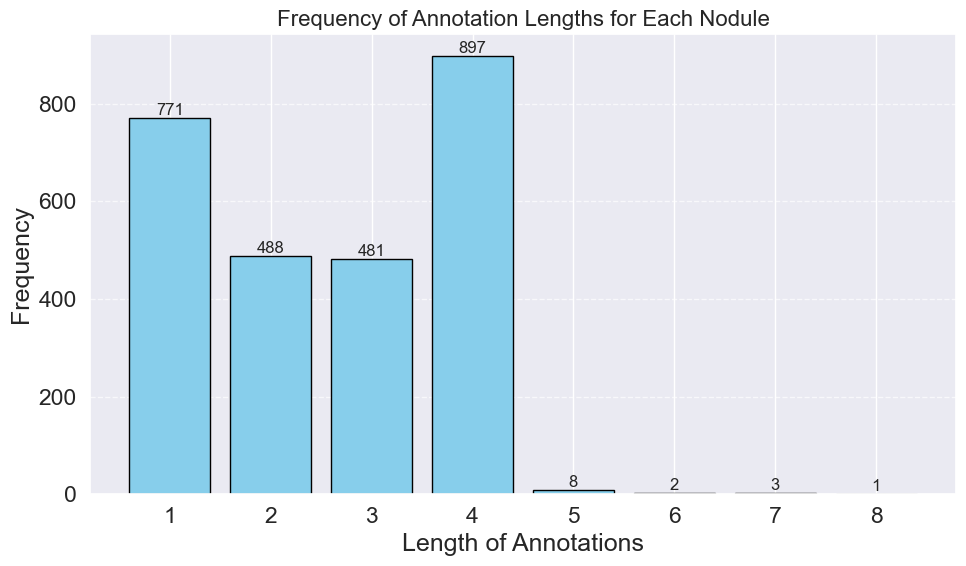

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que ya tienes un DataFrame llamado df




# **Nodule check**

In [77]:
ann = pl.query(pl.Scan).filter(pl.Scan.patient_id=="LIDC-IDRI-0332").first()
s = ann.cluster_annotations()
s[0][3].malignancy





5